In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
        
%config InlineBackend.figure_format = 'retina'
plt.rcParams['figure.dpi'] = 100

In [2]:
job_code = pd.read_excel('job_code_translated.xlsx')
df = pd.read_csv('Korea Income and Welfare.csv')
df

# 무한 값을 NaN으로 명시적으로 변환
df.replace([float('inf'), -float('inf')], pd.NA, inplace=True)


In [3]:
# fill with previous values
job_code.ffill(inplace=True)

In [4]:
# Merge job_code, df
df['occupation'] = df['occupation'].replace({' ': 0}).astype(int)
df = pd.merge(df, job_code, left_on='occupation',
              right_on='job_code',  how='left')

In [5]:
# Creating & Editing Features

# Creating
# getting job
df['job_code'] = df['job_code'].fillna(0)
df['getting job'] = df['job_code'].map(lambda x: 1 if x != 0 else x)
df['age'] = np.round(2021 - df['year_born'])

# Editing
# Family member
df['family_member'] = df['family_member'].map(lambda x: x
                                              if x in [1, 2, 3, 4] else '5+')

To understand instance meanings, let's change number to meaning. 

In [6]:
# region
df.loc[:, 'region'] = df['region'].replace({
    1: 'Seoul',
    2: 'Kyeong-gi',
    3: 'Kyoung-nam',
    4: 'Kyoung-buk',
    5: 'Chung-nam',
    6: 'Gang-won/Chung-buk',
    7: 'Jeolla/Jeju'
})
# gender
df.loc[:, 'gender'] = df['gender'].replace({1: 'male', 2: 'female'})

# education_level
df.loc[:, 'education_level'] = df['education_level'].replace({
    1:
    'no education(<7)',
    2:
    'no education(>=7)',
    3:
    'elementary',
    4:
    'middle school',
    5:
    'high school',
    6:
    'college',
    7:
    'university degree',
    8:
    'MA',
    9:
    'doctoral degree'
})
# marriage
df.loc[:, 'marriage'] = df['marriage'].replace({
    1: 'not applicable(<18)',
    2: 'married',
    3: 'separated by death',
    4: 'separated',
    5: 'not married yet',
    6: 'others'
})

# religion
df.loc[:, 'religion'] = df['religion'].replace({
    1: 'have religion',
    2: 'do not have'
})

df.loc[:, 'reason_none_worker'] = df['reason_none_worker'].replace({
    '1':
    'no capable',
    '2':
    'in military service',
    '3':
    'studying in school',
    '4':
    'prepare for school',
    '5':
    'prepare to apply job',
    '6':
    'house worker',
    '7':
    'caring kids at home',
    '8':
    'nursing',
    '9':
    'giving-up economic activities',
    '10':
    'no intention to work',
    '11':
    'others'
})

df['Main_category'] = df['대분류'].replace({
    '1 관리자': 'Manager',
    '2 전문가 및 관련 종사자': 'Expert and related worker',
    '3 사무 종사자': 'Office worker',
    '4 서비스 종사자': 'Service worker',
    '5 판매 종사자': 'Sales worker',
    '6 농림어업 숙련 종사자': 'Skilled worker in agriculture, forestry and fisheries',
    '7 기능원 및 관련 기능 종사자': 'Craftsmen and related skilled workers',
    '8 장치ㆍ기계 조작 및 조립 종사자':
    'Equipment and machine operation and assembly workers',
    '9 단순노무 종사자': 'Simple labor worker',
    'A 군인': 'Soldier'
})

# df['reason_none_worker'] = df['reason_none_worker'].replace({' ' : np.nan, '99' : np.nan, '0' : np.nan})

# About Visualization

There are many way and tools to visualize data, such as Seaborn, Plotly and so on.   
Especially, Seaborn is very commom, useful and easy way to draw plot.  


But I personally prefer to draw plot manually although this way takes more time to visualize than tools like seaborn surely.  
Because it helps me to understand data structure and I can show customizing graph.




# EDA for Korea income and welfare  

Let's have a look 3-years data(2005, 2012, 2018) to observe changes for few year.  
I focused on regional differences because of centralization of the metropolitan area, especially Seoul.  


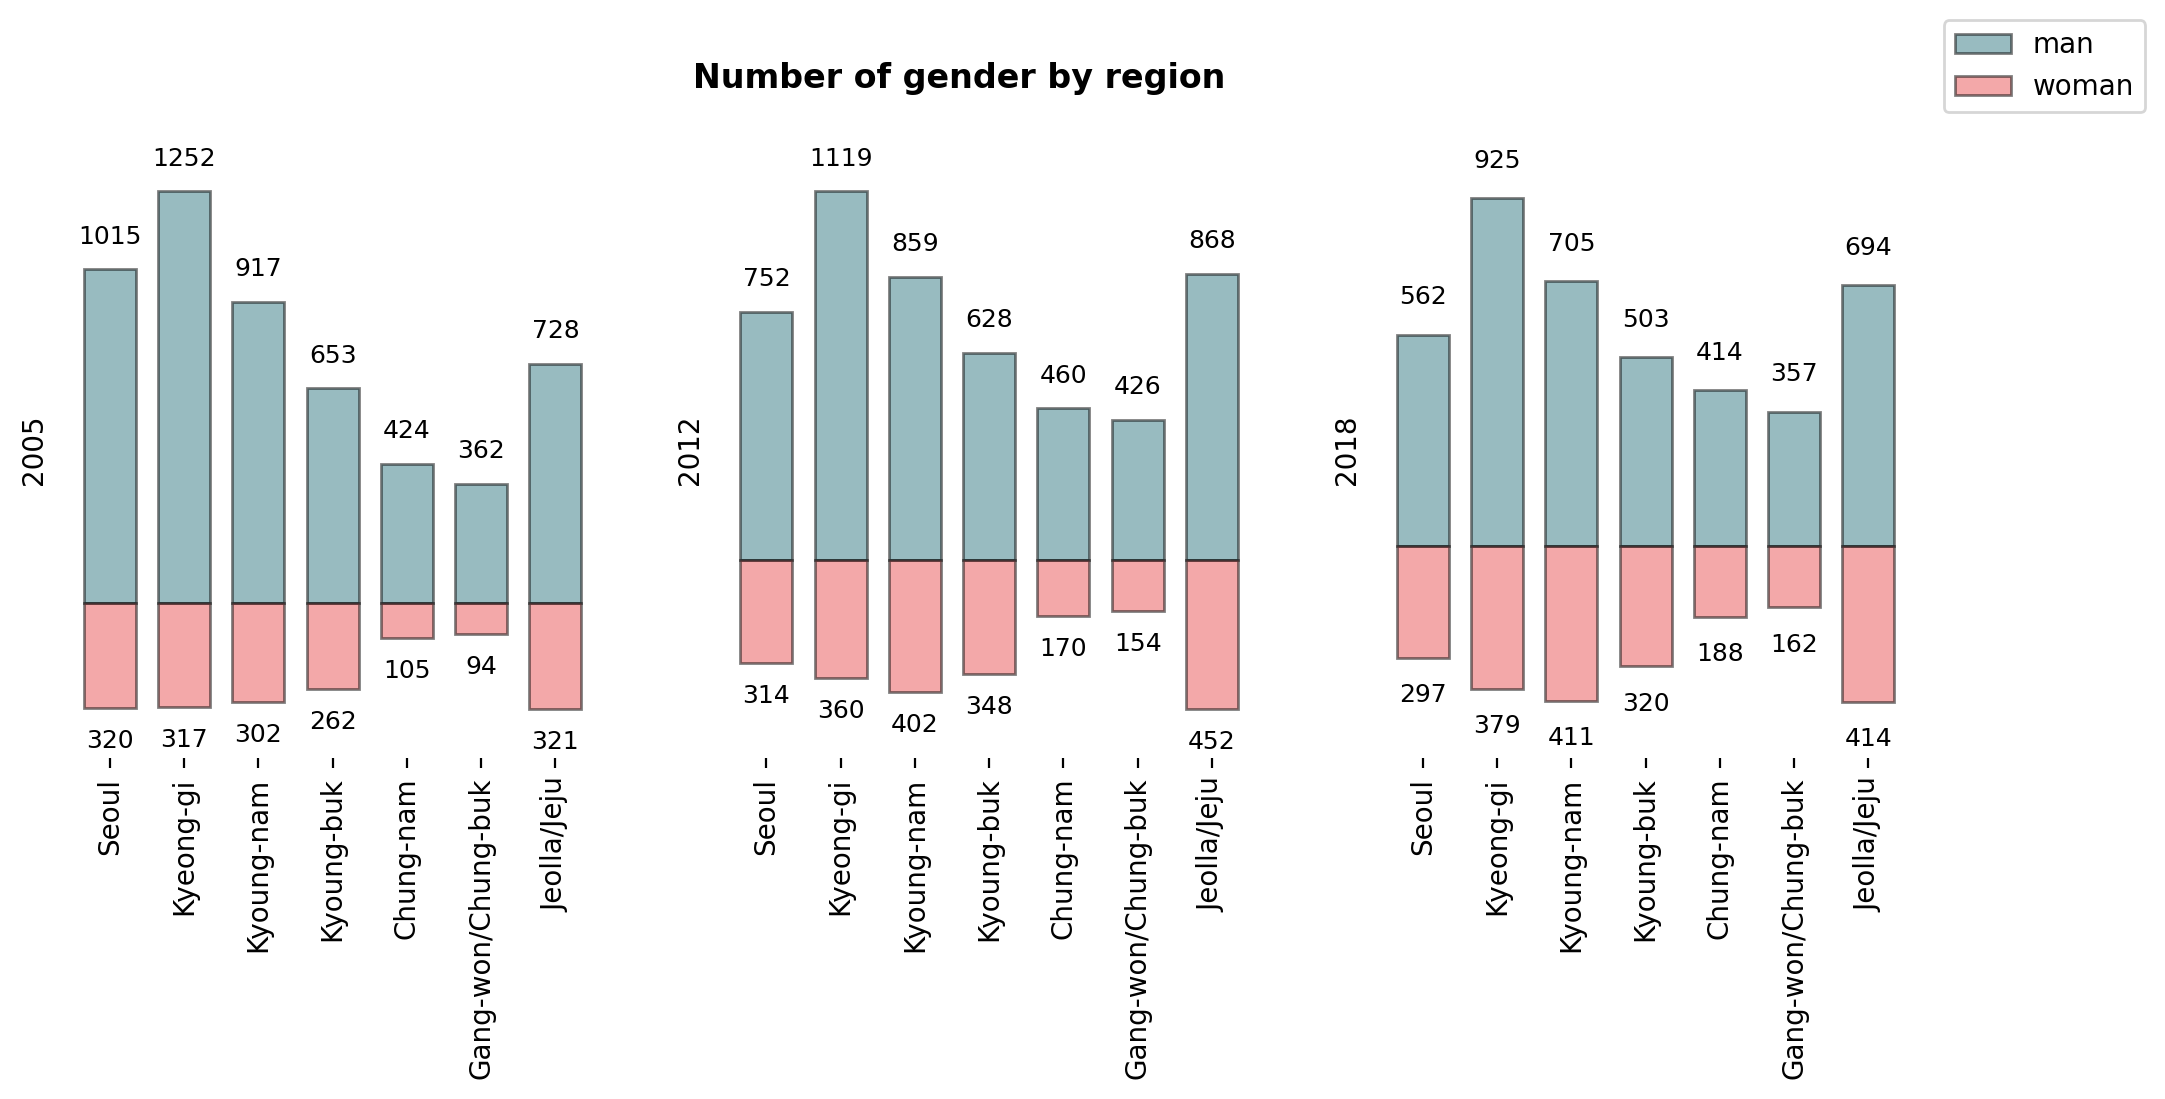

In [7]:
import matplotlib.pyplot as plt

# 3-years data(2005, 2012, 2018)
region_order = ['Seoul', 'Kyeong-gi', 'Kyoung-nam', 'Kyoung-buk', 
                'Chung-nam', 'Gang-won/Chung-buk', 'Jeolla/Jeju']

def plot_gender(in_df, region_order, ax):
    region_man = in_df[in_df['gender'] == 'male']['region'].value_counts()[region_order]
    region_woman = in_df[in_df['gender'] == 'female']['region'].value_counts()[region_order]

    ax.bar(region_man.index, region_man, width=0.7, edgecolor='black', color='#337882', alpha=0.5, label='man')
    ax.bar(region_woman.index, -region_woman, width=0.7, edgecolor='black', color='#e85255', alpha=0.5, label='woman')

    # Annotation
    for idx in region_man.index:
        # Man
        ax.annotate(f"{region_man[idx]}",
                    xy=(idx, region_man[idx] + 100),
                    va='center',
                    ha='center',
                    fontweight='light',
                    fontsize=9)
        # Woman
        ax.annotate(f"{region_woman[idx]}",
                    xy=(idx, -region_woman[idx] - 100),
                    va='center',
                    ha='center',
                    fontweight='light',
                    fontsize=9)

    ax.set_ylim(-max(region_woman) - 150, max(region_man) + 150)
    ax.set_yticks([])
    ax.set_xticks(range(len(region_man.index)))  # Add this line
    ax.set_xticklabels(region_man.index, rotation=90)

    # Remove guide lines
    for s in ['top', 'bottom', 'left', 'right']:
        ax.spines[s].set_visible(False)

# Assuming df is your DataFrame
df_2005 = df[df['year'] == 2005]
df_2012 = df[df['year'] == 2012]
df_2018 = df[df['year'] == 2018]

data = [df_2005, df_2012, df_2018]

fig, axes = plt.subplots(1, 3, figsize=(12, 4))

i = 0
for d in data:
    plot_gender(d, region_order, axes[i])
    i += 1

handles, labels = axes[2].get_legend_handles_labels()
fig.legend(handles, labels, bbox_to_anchor=(1, 1.05))

axes[0].set_ylabel('2005')
axes[1].set_ylabel('2012')
axes[2].set_ylabel('2018')

fig.suptitle('Number of gender by region', fontsize=12, fontweight='bold')
plt.show()


- In other regions except for metropolitan area(Seoul, Kyeong-gi), ration of the elder is incresing.  
- In general, ratio of young people(under 40s) is deceasing.


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

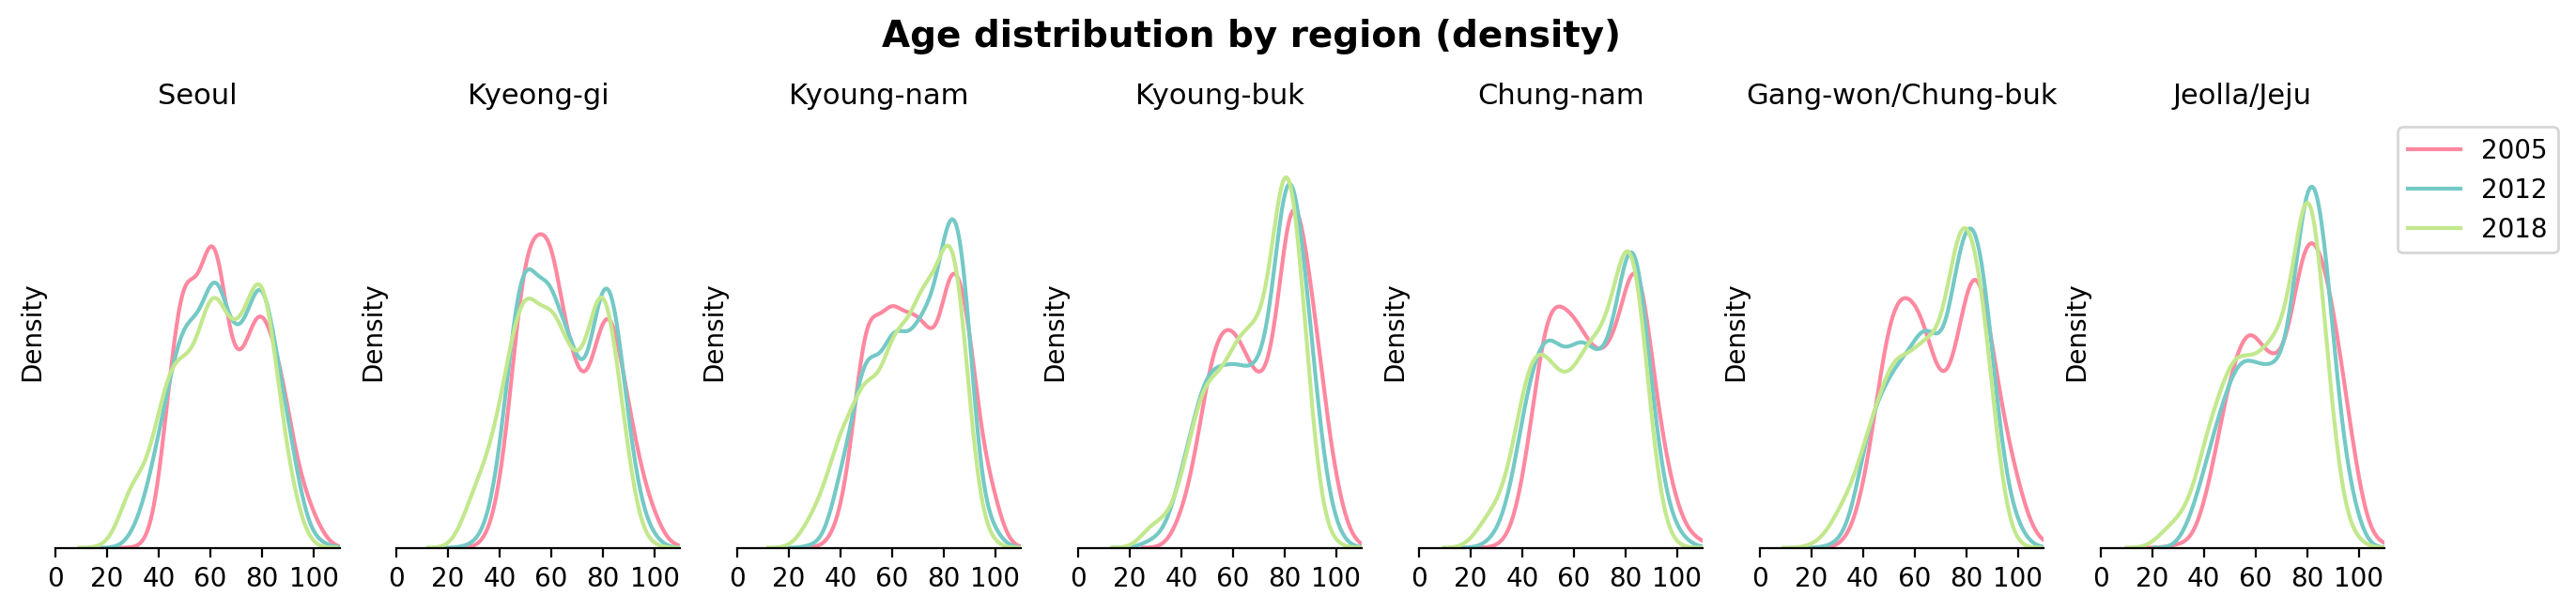

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def plot_age(indf, region_order, ax, color):
    i = 0
    for idx in region_order:
        val = indf[indf['region'] == idx]['age']
        sns.kdeplot(val, color=color, ax=ax[i], label=' ')
        
        ax[i].set_xlabel(idx, fontsize=11, fontweight='light')
        ax[i].set_yticks([])
        
        ax[i].set_xlim(0, 110)
        ax[i].set_ylim(0, 0.035)
        ax[i].set_xticks([0, 20, 40, 60, 80, 100])
        ax[i].xaxis.set_label_position('top')
        
        for s in ['top', 'left', 'right']:
            ax[i].spines[s].set_visible(False)

        i += 1

colors = ['#fe88a0', '#74c9c6', '#c2e88d']

fig, axes = plt.subplots(1, 7, figsize=(16, 3))

# 데이터프레임에서 무한대 값을 NaN으로 변환
for i in range(len(data)):
    data[i] = data[i].replace([np.inf, -np.inf], np.nan)

i = 0
for d, c in zip(data, colors):
    plot_age(d, region_order, axes, c)
    i += 1
    
# Remove legend
for i in range(6):
    plt.setp(axes[i].legend(), visible=False)
    
fig.text(0.4, 1, 'Age distribution by region (density)', fontsize=14, fontweight='bold')
plt.legend(['2005', '2012', '2018'], bbox_to_anchor=(1, 1))
plt.show()


- no education<7 and no education(>=) ratio are decreasing.
- ratio of over university is high in metropolitan area and Chung-nam.
- There is Sejong city, Multifunctional Administrative City in Chung-nam. I think it is one of reason that education level is increasing.

/var/folders/6f/wv_c62016wx7vx7_xdts9m740000gn/T/ipykernel_27277/2922896731.py:32: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  xy=(ro, region_ed_ratio[idx].loc[ro]/2 + i[region_order.index(ro)]),
/var/folders/6f/wv_c62016wx7vx7_xdts9m740000gn/T/ipykernel_27277/2922896731.py:32: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  xy=(ro, region_ed_ratio[idx].loc[ro]/2 + i[region_order.index(ro)]),
/var/folders/6f/wv_c62016wx7vx7_xdts9m740000gn/T/ipykernel_27277/2922896731.py:32: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (c

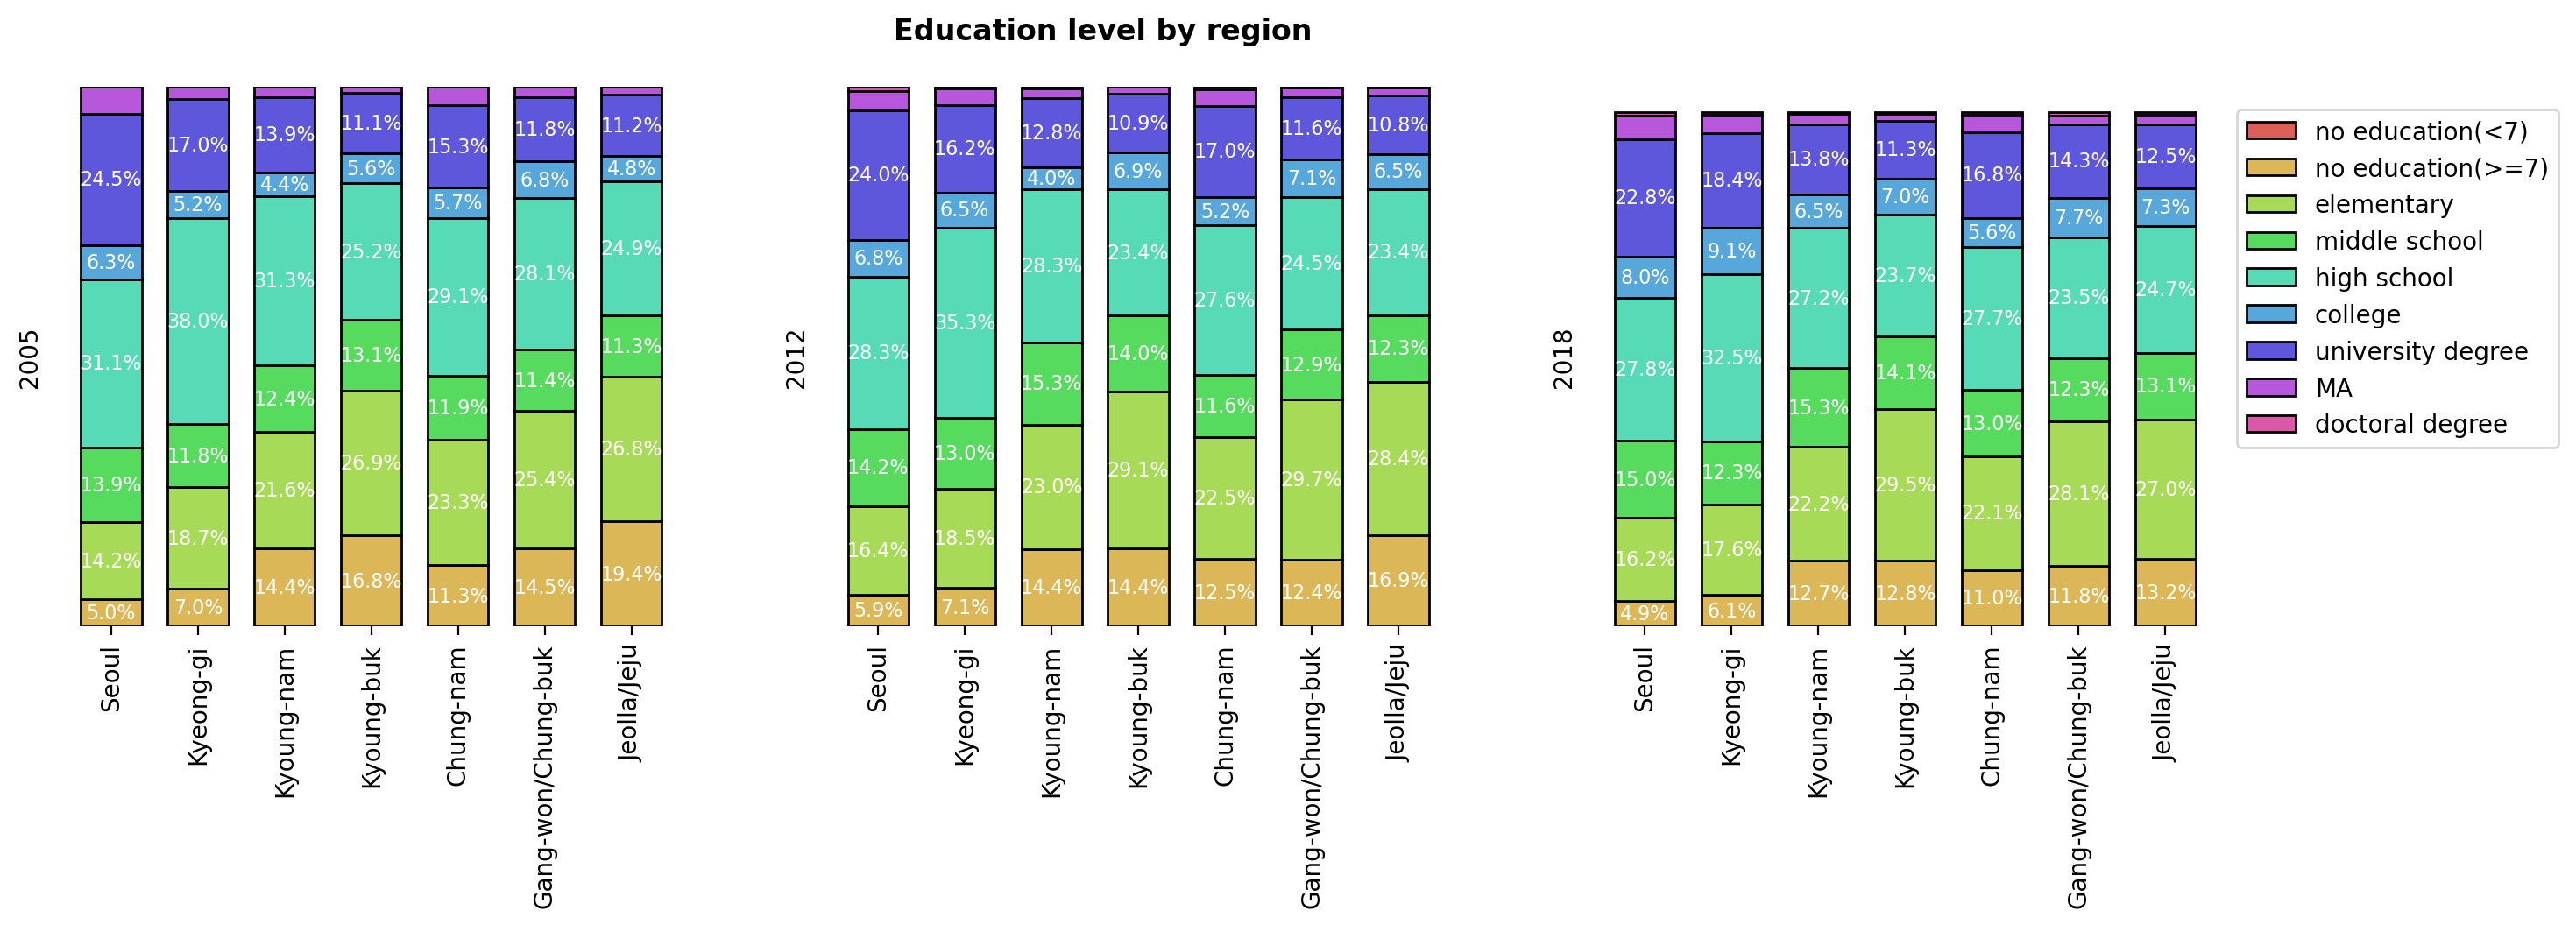

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 교육 수준을 위한 순서 정의
ed_order = ['no education(<7)', 'no education(>=7)', 'elementary',
            'middle school', 'high school', 'college',
            'university degree', 'MA', 'doctoral degree']

def plot_ed_lv(indf, region_order, ax):
    region_ed = indf.groupby(['region', 'education_level'])['education_level'].count().unstack().reindex(region_order)

    # 누락된 열 찾기
    if len(set(ed_order) - set(region_ed.columns)) != 0:
        not_include = list(set(ed_order) - set(region_ed.columns))
        region_ed[not_include] = 0

    region_ed_ratio = (region_ed.T / region_ed.sum(axis=1)).T

    # 누적 막대 그래프 그리기
    colors = sns.color_palette('hls', n_colors=len(ed_order))

    i = np.zeros(len(region_order))
    for idx, color in zip(ed_order, colors):
        ax.bar(region_ed_ratio.index,
               region_ed_ratio[idx], width=0.7, edgecolor='black', bottom=i, label=idx, color=color)

        # ed_order에 대한 주석 추가
        for ro in region_order:
            if idx in ['no education(>=7)', 'elementary', 'middle school', 'high school', 'college', 'university degree']:
                ax.annotate(f"{region_ed_ratio[idx].loc[ro] * 100 :.1f}%",
                            xy=(ro, region_ed_ratio[idx].loc[ro]/2 + i[region_order.index(ro)]),
                            va='center',
                            ha='center',
                            color='white',
                            fontsize=8)
        i += region_ed_ratio[idx]

    ax.set_yticks([])
    ax.set_xticks(np.arange(len(region_ed_ratio.index)))
    ax.set_xticklabels(region_ed_ratio.index, rotation=90)
    for s in ['top', 'bottom', 'left', 'right']:
        ax.spines[s].set_visible(False)

fig, axes = plt.subplots(1, 3, figsize=(16, 4))
i = 0
for d in data:
    plot_ed_lv(d, region_order, axes[i])
    i += 1
axes[2].legend(bbox_to_anchor=(1, 0.98))
axes[0].set_ylabel('2005')
axes[1].set_ylabel('2012')
axes[2].set_ylabel('2018')

fig.suptitle('Education level by region', fontsize=12, fontweight='bold')
plt.show()


- ratio of single-person households have increased in all regions.
- But ratio of multi-family members of 3 or more have decreased.

AttributeError: 'int' object has no attribute 'startswith'

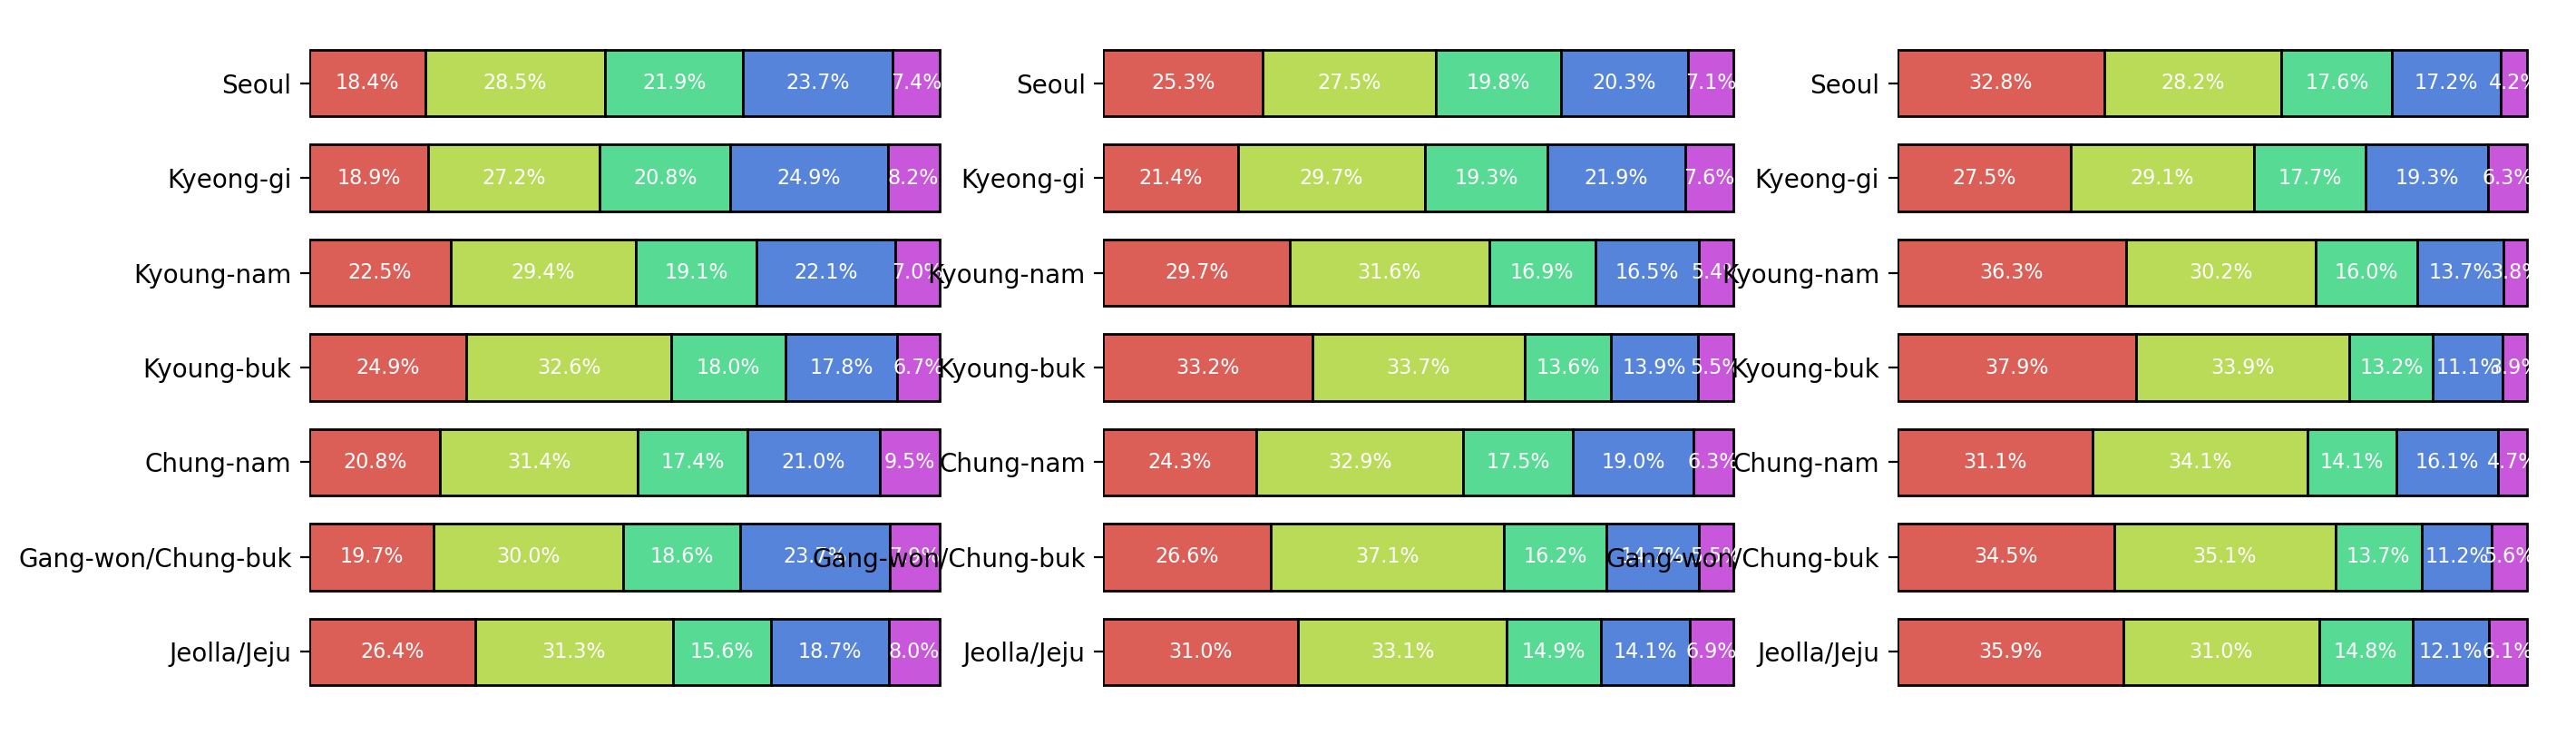

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def plot_family(indf, region_order, ax):
    region_family = indf.groupby(['region', 'family_member'])['family_member'].count().unstack().reindex(region_order)[::-1]
    region_family_ratio = (region_family.T / region_family.sum(axis=1)).T

    # Draw stacked bar plot
    colors = sns.color_palette('hls', n_colors=len(region_family.columns))

    i = pd.Series(data=[0 for _ in range(len(region_order))], index=region_order[::-1])

    for col, color in zip(region_family_ratio.columns, colors):
        ax.barh(region_family_ratio.index, region_family_ratio[col], height=0.7, edgecolor='black', left=i, label=col, color=color)
        for ro in region_order:
            ax.annotate(f"{region_family_ratio[col][ro] * 100:.1f}%",
                        xy=(i[ro] + region_family_ratio[col][ro] / 2, ro),
                        va='center',
                        ha='center',
                        fontsize=8,
                        color='white')
        i += region_family_ratio[col]

    ax.set_xticks([])
    ax.set_yticks(np.arange(len(region_family_ratio.index)))
    ax.set_yticklabels(region_family_ratio.index)
    ax.xaxis.set_label_position('top')
    for s in ['top', 'bottom', 'left', 'right']:
        ax.spines[s].set_visible(False)

fig, axes = plt.subplots(1, 3, figsize=(16, 5))
i = 0
for d in data:
    plot_family(d, region_order, axes[i])
    i += 1

# Correctly setup the legend by specifying the handles and labels
handles, labels = [], []
for ax in axes:
    for handle, label in zip(*ax.get_legend_handles_labels()):
        if label not in labels:
            handles.append(handle)
            labels.append(label)

fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.1), ncol=5)

axes[0].set_xlabel('2005', fontweight='bold', fontsize=12)
axes[1].set_xlabel('2012', fontweight='bold', fontsize=12)
axes[2].set_xlabel('2018', fontweight='bold', fontsize=12)

axes[1].set_yticks([])
axes[2].set_yticks([])

fig.suptitle('Family members by region', fontsize=14, fontweight='bold')
plt.show()


In [ ]:
# average yearly income

def plot_income(indf, region_order, ax):
    # not include income < 0
    # It means Null or doubt
    region_income = indf[indf['income'] > 0].groupby(['region', 'family_member'])[
        'income'].mean().unstack().reindex(region_order).astype(int)
    sns.heatmap(region_income, vmin=0, vmax=8000, annot=True,
                fmt='d', ax=ax, cmap='jet', cbar=False, lw=2)
    ax.xaxis.set_label_position('top')

fig, axes = plt.subplots(1, 3, figsize=(16, 5))

i = 0
for d in data:
    plot_income(d, region_order, axes[i])
    i += 1

axes[0].set_xlabel('2005', fontweight='bold', fontsize=12)
axes[1].set_xlabel('2012', fontweight='bold', fontsize=12)
axes[2].set_xlabel('2018', fontweight='bold', fontsize=12)

axes[1].set_yticks([])
axes[2].set_yticks([])
axes[1].set_ylabel('')
axes[2].set_ylabel('')

fig.text(0.42, 1, 'Household income by region', fontsize=14, fontweight='bold')
plt.show()

In [ ]:
# average yearly income per person for family member

def plot_income_per_person(indf, region_order, ax):
    region_income = indf[indf['income'] > 0].groupby(['region', 'family_member'])[
        'income'].mean().unstack().reindex(region_order)

    z = 1
    for col in region_income.columns:
        region_income.loc[:, col] = (region_income[col] / z).astype(int)
        z += 1

    sns.heatmap(region_income, vmin=0, vmax=2500, annot=True,
                fmt='d', ax=ax, cmap='jet', cbar=False, lw=2)
    ax.xaxis.set_label_position('top')


fig, axes = plt.subplots(1, 3, figsize=(16, 5))
i = 0
for d in data:
    plot_income_per_person(d, region_order, axes[i])
    i += 1

axes[0].set_xlabel('2005', fontweight='bold', fontsize=12)
axes[1].set_xlabel('2012', fontweight='bold', fontsize=12)
axes[2].set_xlabel('2018', fontweight='bold', fontsize=12)

axes[1].set_yticks([])
axes[2].set_yticks([])
axes[1].set_ylabel('')
axes[2].set_ylabel('')

fig.text(0.32, 1, 'Household income per person for family member by region',
         fontsize=14, fontweight='bold')
plt.show()

In [ ]:
# Getting job


def plot_getting_job(indf, region_order, ax):

    region_job = indf.groupby(['region', 'getting job'])[
        'getting job'].count().unstack().reindex(region_order)[::-1]
    region_ratio = (region_job.T / region_job.sum(axis=1)).T

    ax.barh(region_ratio.index,
            region_ratio[1], label='Have job', edgecolor='black', color='#337882', alpha=0.5)
    ax.barh(region_ratio.index, region_ratio[0], left=region_ratio[1],
            label='Don\'t have job', edgecolor='black', color='#e85255', alpha=0.5)

    for ro in region_order[::-1]:
        ax.annotate(f"{region_ratio[1][ro] * 100 : .1f}%",
                    xy=(region_ratio[1][ro]/2, ro),
                    va='center',
                    ha='center',
                    fontsize=9,
                    color='white')
        ax.annotate(f"{region_ratio[0][ro] * 100 : .1f}%",
                    xy=(region_ratio[1][ro] + region_ratio[0][ro]/2, ro),
                    va='center',
                    ha='center',
                    fontsize=9,
                    color='white')

        for s in ['top', 'bottom', 'left', 'right']:
            ax.spines[s].set_visible(False)

        ax.set_xticks([])
        ax.xaxis.set_label_position('top')


fig, axes = plt.subplots(1, 3, figsize=(16, 5))
i = 0
for d in data:
    plot_getting_job(d, region_order, axes[i])
    i += 1

axes[1].legend(loc='lower center', bbox_to_anchor=(0.45, -0.1), ncol=5)
axes[0].set_xlabel('2005', fontsize=12, fontweight='bold')
axes[1].set_xlabel('2012', fontsize=12, fontweight='bold')
axes[2].set_xlabel('2018', fontsize=12, fontweight='bold')

axes[1].set_yticks([])
axes[2].set_yticks([])

fig.text(0.40, 1, 'Ratio of getting job by region',
         fontsize=14, fontweight='bold')
plt.show()

In [ ]:
category_order = ['Manager', 'Expert and related worker', 'Office worker',
                  'Service worker', 'Sales worker',
                  'Skilled worker in agriculture, forestry and fisheries',
                  'Craftsmen and related skilled workers',
                  'Equipment and machine operation and assembly workers',
                  'Simple labor worker']    # except for soldier


def plot_job(indf, region_order, ax):
    region_job = indf.groupby(['region', 'Main_category'])['Main_category'].count(
    ).unstack().fillna(0)[category_order].reindex(region_order).astype(int).T

#     diff = list(set(reason_order) - set(region_reason.columns))
#     if len(diff) != 0:
#         region_reason[diff] = 0

    sns.heatmap(region_job, vmin=0, vmax=150, annot=True, fmt='d',
                ax=ax, cmap='Oranges', cbar=False, lw=2, alpha=0.7)
    ax.xaxis.set_label_position('top')


fig, axes = plt.subplots(1, 3, figsize=(18, 5))

i = 0
for d in data:
    plot_job(d, region_order, axes[i])
    i += 1

axes[0].set_xlabel('2005', fontweight='bold', fontsize=12)
axes[1].set_xlabel('2012', fontweight='bold', fontsize=12)
axes[2].set_xlabel('2018', fontweight='bold', fontsize=12)

axes[1].set_yticks([])
axes[2].set_yticks([])

axes[0].set_ylabel('')
axes[1].set_ylabel('')
axes[2].set_ylabel('')

fig.text(0.42, 1, 'Job category per year', fontweight='bold', fontsize=14)

plt.show()

In [ ]:
# scatter plot of average yearly income of job category by region
fig = plt.figure(figsize=(12, 10))
gs = fig.add_gridspec(7, 7)

# Design plot
ax_scatter = fig.add_subplot(gs[2:-1, :5])
ax_barx = fig.add_subplot(gs[0:2, :5], sharex=ax_scatter)
ax_bary = fig.add_subplot(gs[2:-1, 5:], sharey=ax_scatter)

colors = sns.color_palette('hls', n_colors=len(category_order))

# plot ax_scatter
region_income = df_2005[df_2005['income'] > 0].groupby(
    ['region', 'Main_category'])['income'].mean().unstack().fillna(0).stack()

for i in region_order:
    c_idx = 0
    for j in category_order[::-1]:
        ax_scatter.scatter(i, j, region_income[i][j] / 12, c=colors[c_idx])

        c_idx += 1

        ax_scatter.annotate(f"{region_income[i][j] / 1000 : .1f}",
                            xy=(i, j),
                            va='center',
                            ha='center',
                            color='black')

# plot ax_barx
region_job = df_2005.groupby(['region', 'Main_category'])[
    'Main_category'].count().unstack().fillna(0)[category_order][::-1]
region_job_ratio = (region_job.T/region_job.sum(axis=1)
                    ).T.reindex(region_order)

c_idx = 0
i = pd.Series(data=[0 for _ in range(len(region_order))], index=region_order)
for col in region_job_ratio.columns[::-1]:
    ax_barx.bar(region_job_ratio.index,
                region_job_ratio[col], bottom=i, edgecolor='black', label=col, color=colors[c_idx])

    for ro in region_order:
        ax_barx.annotate(f"{region_job_ratio[col][ro] * 100 :.1f}",
                         xy=(ro, region_job_ratio[col][ro]/2 + i[ro]),
                         va='center',
                         ha='center',
                         fontsize=9,
                         color='white')
    i += region_job_ratio[col]
    c_idx += 1


# plot ax_bary

job = df_2005['Main_category'].value_counts()[category_order][::-1]

ax_bary.barh(job.index, job, edgecolor='black',
             color=sns.light_palette('purple', len(job)))
ax_bary.plot(job, job.index, color='purple', ls='--', alpha=0.3, lw=0.7)

for idx in job.index:
    ax_bary.annotate(f"{job[idx] /job.sum() * 100 :.1f}%",
                     xy=(job[idx] + 100, idx),
                     va='center',
                     ha='center',
                     fontsize=9,
                     color='black')

# set graph

for s in ['top', 'right', 'left', 'bottom']:
    ax_scatter.spines[s].set_visible(False)
    ax_barx.spines[s].set_visible(False)
    ax_bary.spines[s].set_visible(False)

# ax_scatter
ax_scatter.grid('--', lw=0.2)
ax_scatter.set_xticklabels(region_order, rotation=30)

# ax_barx
ax_barx.set_yticks([])

# ax_bary
ax_bary.grid(axis='x', ls='--')
ax_bary.set_xlim(0, job.max() + 150)

plt.setp(ax_barx.get_xticklabels(), visible=False)
plt.setp(ax_bary.get_yticklabels(), visible=False)

fig.text(0.13, 0.9, 'Yearly income scatter plot(2005, circle value : M KRW / 1000)',
         fontsize=14, fontweight='bold')
plt.show()

In [ ]:
fig = plt.figure(figsize=(12, 10))
gs = fig.add_gridspec(7, 7)

# Design plot
ax_scatter = fig.add_subplot(gs[2:-1, :5])
ax_barx = fig.add_subplot(gs[0:2, :5], sharex=ax_scatter)
ax_bary = fig.add_subplot(gs[2:-1, 5:], sharey=ax_scatter)

colors = sns.color_palette('hls', n_colors=len(category_order))

# plot ax_scatter
region_income = df_2012[df_2012['income'] > 0].groupby(
    ['region', 'Main_category'])['income'].mean().unstack().fillna(0).stack()

for i in region_order:
    c_idx = 0
    for j in category_order[::-1]:
        ax_scatter.scatter(i, j, region_income[i][j] / 12, c=colors[c_idx])

        c_idx += 1

        ax_scatter.annotate(f"{region_income[i][j] / 1000 : .1f}",
                            xy=(i, j),
                            va='center',
                            ha='center',
                            color='black')

# plot ax_barx
region_job = df_2012.groupby(['region', 'Main_category'])[
    'Main_category'].count().unstack().fillna(0)[category_order][::-1]
region_job_ratio = (region_job.T/region_job.sum(axis=1)
                    ).T.reindex(region_order)

c_idx = 0
i = pd.Series(data=[0 for _ in range(len(region_order))], index=region_order)
for col in region_job_ratio.columns[::-1]:
    ax_barx.bar(region_job_ratio.index,
                region_job_ratio[col], bottom=i, edgecolor='black', label=col, color=colors[c_idx])

    for ro in region_order:
        ax_barx.annotate(f"{region_job_ratio[col][ro] * 100 :.1f}",
                         xy=(ro, region_job_ratio[col][ro]/2 + i[ro]),
                         va='center',
                         ha='center',
                         fontsize=9,
                         color='white')
    i += region_job_ratio[col]
    c_idx += 1

# plot ax_bary

job = df_2018['Main_category'].value_counts()[category_order][::-1]

ax_bary.barh(job.index, job, edgecolor='black',
             color=sns.light_palette('purple', len(job)))
ax_bary.plot(job, job.index, color='purple', ls='--', alpha=0.3, lw=0.7)

for idx in job.index:
    ax_bary.annotate(f"{job[idx] /job.sum() * 100 :.1f}%",
                     xy=(job[idx] + 100, idx),
                     va='center',
                     ha='center',
                     fontsize=9,
                     color='black')


# set graph

for s in ['top', 'right', 'left', 'bottom']:
    ax_scatter.spines[s].set_visible(False)
    ax_barx.spines[s].set_visible(False)
    ax_bary.spines[s].set_visible(False)

# ax_scatter
ax_scatter.grid('--', lw=0.2)
ax_scatter.set_xticklabels(region_order, rotation=30)

# ax_barx
ax_barx.set_yticks([])

# ax_bary
ax_bary.grid(axis='x', ls='--')
ax_bary.set_xlim(0, job.max() + 150)

plt.setp(ax_barx.get_xticklabels(), visible=False)
plt.setp(ax_bary.get_yticklabels(), visible=False)

fig.text(0.13, 0.9, 'Yearly income scatter plot(2012, circle value : M KRW / 1000)',
         fontsize=14, fontweight='bold')
plt.show()

In [ ]:
fig = plt.figure(figsize=(12, 10))
gs = fig.add_gridspec(7, 7)

# Design plot
ax_scatter = fig.add_subplot(gs[2:-1, :5])
ax_barx = fig.add_subplot(gs[0:2, :5], sharex=ax_scatter)
ax_bary = fig.add_subplot(gs[2:-1, 5:], sharey=ax_scatter)

colors = sns.color_palette('hls', n_colors=len(category_order))

# plot ax_scatter
region_income = df_2018[df_2018['income'] > 0].groupby(
    ['region', 'Main_category'])['income'].mean().unstack().fillna(0).stack()

for i in region_order:
    c_idx = 0
    for j in category_order[::-1]:
        ax_scatter.scatter(i, j, region_income[i][j] / 12, c=colors[c_idx])

        c_idx += 1

        ax_scatter.annotate(f"{region_income[i][j] / 1000 : .1f}",
                            xy=(i, j),
                            va='center',
                            ha='center',
                            color='black')

# plot ax_barx
region_job = df_2018.groupby(['region', 'Main_category'])[
    'Main_category'].count().unstack().fillna(0)[category_order][::-1]
region_job_ratio = (region_job.T/region_job.sum(axis=1)
                    ).T.reindex(region_order)

c_idx = 0
i = pd.Series(data=[0 for _ in range(len(region_order))], index=region_order)
for col in region_job_ratio.columns[::-1]:
    ax_barx.bar(region_job_ratio.index,
                region_job_ratio[col], bottom=i, edgecolor='black', label=col, color=colors[c_idx])

    for ro in region_order:
        ax_barx.annotate(f"{region_job_ratio[col][ro] * 100 :.1f}",
                         xy=(ro, region_job_ratio[col][ro]/2 + i[ro]),
                         va='center',
                         ha='center',
                         fontsize=9,
                         color='white')
    i += region_job_ratio[col]
    c_idx += 1


# plot ax_bary

job = df_2018['Main_category'].value_counts()[category_order][::-1]

ax_bary.barh(job.index, job, edgecolor='black',
             color=sns.light_palette('purple', len(job)))
ax_bary.plot(job, job.index, color='purple', ls='--', alpha=0.3, lw=0.7)

for idx in job.index:
    ax_bary.annotate(f"{job[idx] /job.sum() * 100 :.1f}%",
                     xy=(job[idx] + 100, idx),
                     va='center',
                     ha='center',
                     fontsize=9,
                     color='black')


# set graph

for s in ['top', 'right', 'left', 'bottom']:
    ax_scatter.spines[s].set_visible(False)
    ax_barx.spines[s].set_visible(False)
    ax_bary.spines[s].set_visible(False)

# ax_scatter
ax_scatter.grid('--', lw=0.2)
ax_scatter.set_xticklabels(region_order, rotation=30)

# ax_barx
ax_barx.set_yticks([])

# ax_bary
ax_bary.grid(axis='x', ls='--')
ax_bary.set_xlim(0, job.max() + 150)

plt.setp(ax_barx.get_xticklabels(), visible=False)
plt.setp(ax_bary.get_yticklabels(), visible=False)

fig.text(0.13, 0.9, 'Yearly income scatter plot(2018, circle value : M KRW / 1000)',
         fontsize=14, fontweight='bold')
plt.show()

In [ ]:
# Reason for no job

# reason_order = ['giving-up economic activities','no intention to work', 'no capable', 'in military service', 'studying in school',
#                 'prepare for school','prepare to apply job', 'house worker','caring kids at home', 'nursing', 'others']

reason_order = ['giving-up economic activities', 'no intention to work', 'no capable', 'studying in school',
                'prepare to apply job', 'house worker', 'caring kids at home', 'nursing']


def plot_reason(indf, region_order, ax):
    region_reason = indf.groupby(['region', 'reason_none_worker'])[
        'reason_none_worker'].count().unstack().fillna(0).reindex(region_order).astype(int)

    diff = list(set(reason_order) - set(region_reason.columns))
    if len(diff) != 0:
        region_reason[diff] = 0

    sns.heatmap(region_reason[reason_order].T, vmin=0, vmax=30, annot=True,
                fmt='d', ax=ax, cmap='Oranges', cbar=False, lw=2, alpha=0.7)
    ax.xaxis.set_label_position('top')


fig, axes = plt.subplots(1, 3, figsize=(18, 5))
i = 0
for d in data:
    plot_reason(d, region_order, axes[i])
    i += 1

axes[0].set_xlabel('2005', fontweight='bold', fontsize=12)
axes[1].set_xlabel('2012', fontweight='bold', fontsize=12)
axes[2].set_xlabel('2018', fontweight='bold', fontsize=12)


axes[1].set_yticks([])
axes[2].set_yticks([])

axes[0].set_ylabel('')
axes[1].set_ylabel('')
axes[2].set_ylabel('')

fig.text(0.42, 1, 'Reason for no job by year', fontweight='bold', fontsize=14)

plt.show()

In [ ]:

# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [ ]:

# Load the dataset
data = pd.read_csv('korea_income_welfare.csv')

# Preprocess the data (dummy steps - to be replaced with actual steps from the notebook)
# Example preprocessing: Handling missing values, encoding categorical features, scaling numerical features
data = data.dropna()  # Dropping missing values (dummy step)

# Assume the dataset has columns 'feature1', 'feature2', ..., 'target'
# Replace these with actual feature columns and target column from the dataset
# X = data[['feature1', 'feature2', ...]]  # Features
# y = data['target']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:

# Initialize the models
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Train the models
rf_model.fit(X_train_scaled, y_train)
gb_model.fit(X_train_scaled, y_train)

# Make predictions
rf_pred = rf_model.predict(X_test_scaled)
gb_pred = gb_model.predict(X_test_scaled)

# Evaluate the models
print("Random Forest Classifier Report")
print(classification_report(y_test, rf_pred))

print("Gradient Boosting Classifier Report")
print(classification_report(y_test, gb_pred))


In [ ]:

# Ensemble with Voting Classifier
voting_clf = VotingClassifier(estimators=[('rf', rf_model), ('gb', gb_model)], voting='soft')
voting_clf.fit(X_train_scaled, y_train)

# Make predictions with Voting Classifier
voting_pred = voting_clf.predict(X_test_scaled)

# Evaluate the Voting Classifier
print("Voting Classifier Report")
print(classification_report(y_test, voting_pred))


In [ ]:

# Confusion Matrix and Accuracy Score for Voting Classifier
conf_matrix = confusion_matrix(y_test, voting_pred)
accuracy = accuracy_score(y_test, voting_pred)

print("Confusion Matrix")
print(conf_matrix)
print(f"Accuracy Score: {accuracy:.4f}")
